In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Model architecture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
# Data processing
from tensorflow.keras.utils import to_categorical
# model
from tensorflow.keras import optimizers 
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
data_path = os.getcwd()
data_path = data_path + '/drive/MyDrive/ML_projects/CIFAR10/data/'

# #train path
# train_data_path = data_path + '\\train\\'
data_path

'/content/drive/MyDrive/ML_projects/CIFAR10/data/'

In [ ]:
images = pd.read_json(data_path + 'img_labeled.json')
images.head()

,images,label
0,"[[[63, 62, 59], [45, 46, 43], [43, 48, 50], [4...",frog
1,"[[[187, 177, 154], [136, 137, 126], [95, 104, ...",truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",truck
3,"[[[10, 25, 28], [19, 34, 37], [20, 35, 38], [2...",deer
4,"[[[198, 180, 170], [196, 178, 168], [203, 185,...",automobile


In [ ]:
## convert all images array to ndarray
x_train = images['images'].values
for i in range(len(x_train)):
    x_train[i] = np.array(x_train[i],dtype='float32')
# X_train,X_test,Y_train,Y_test = train_test_split(x_train,images['label'].values,test_size=0.2,random_state=0)
X_train = x_train[:30000]
X_test = x_train[30000:40000]
X_val = x_train[40000:]
# normalize X_train and Y_train between 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255

# train values
arr = []
for i in range(len(X_train)):
    arr.append(X_train[i])
X_train = np.array(arr)

# test values
arr = []
for i in range(len(X_test)):
    arr.append(X_test[i])
X_test = np.array(arr)

# validation values
arr = []
for i in range(len(X_val)):
    arr.append(X_val[i])
X_val = np.array(arr)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'X validation shape: {X_val.shape}')

### Y train, test and validation

y = images['label'].values
Y_train = y[:30000]
Y_test = y[30000:40000]
Y_val = y[40000:]
Y_test


X train shape: (30000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)
X validation shape: (10000, 32, 32, 3)


array(['airplane', 'frog', 'airplane', ..., 'frog', 'bird', 'ship'],
      dtype=object)

In [ ]:
labels = images['label'].unique().tolist()
print(labels)

['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog', 'airplane']


In [ ]:
# label encoding
for i in range(len(Y_train)):
  Y_train[i] = labels.index(Y_train[i])

Y_train[0]
for i in range(len(Y_test)):
  Y_test[i] = labels.index(Y_test[i])
Y_test[0]

for i in range(len(Y_val)):
  Y_val[i] = labels.index(Y_val[i])
# # le = LabelEncoder()
# # Y_train = le.fit_transform(Y_train)
# # Y_test = le.fit_transform(Y_test)
# # Y_val = le.fit_transform(Y_val)
# ## convert label to one hot encoding
Y_train = to_categorical(Y_train,len(labels))
Y_test = to_categorical(Y_test, len(labels))
Y_val = to_categorical(Y_val, len(labels))
print(Y_train[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
batch_size = 32 
epochs = 50

In [ ]:
# first model details
# batch size 32
# kernal size = 3x3
# 3 layers

model_32_3 = Sequential()
model_32_3.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=X_train.shape[1:]))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Conv2D(64,kernel_size=3,activation='relu'))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Conv2D(64,kernel_size=3,activation='relu'))
model_32_3.add(MaxPooling2D(pool_size=2))
model_32_3.add(Dropout(rate=0.2))

model_32_3.add(Flatten())
model_32_3.add(Dense(512,activation='relu'))

model_32_3.add(Dense(10,activation='softmax'))

model_32_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model_32_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
history = model_32_3.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_data=(X_val,Y_val))

Epoch 1/50
938/938 [==============================] - 13s 6ms/step - loss: 1.6684 - accuracy: 0.3848 - val_loss: 1.3553 - val_accuracy: 0.5017
Epoch 2/50
938/938 [==============================] - 5s 6ms/step - loss: 1.3120 - accuracy: 0.5269 - val_loss: 1.2519 - val_accuracy: 0.5608
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 1.1768 - accuracy: 0.5777 - val_loss: 1.1770 - val_accuracy: 0.5870
Epoch 4/50
938/938 [==============================] - 5s 6ms/step - loss: 1.0708 - accuracy: 0.6150 - val_loss: 1.0305 - val_accuracy: 0.6407
Epoch 5/50
938/938 [==============================] - 5s 6ms/step - loss: 0.9895 - accuracy: 0.6453 - val_loss: 0.9557 - val_accuracy: 0.6691
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.9247 - accuracy: 0.6714 - val_loss: 0.9644 - val_accuracy: 0.6634
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.8690 - accuracy: 0.6904 - val_loss: 0.9497 - val_accuracy: 0.6639
Epoch

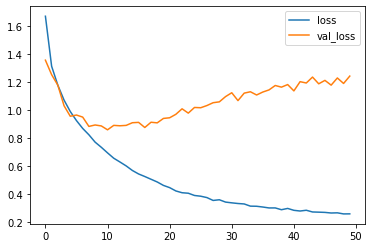

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

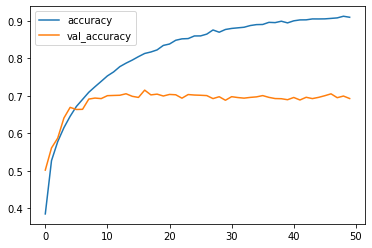

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [ ]:
# evaluate model as score
score = model_32_3.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.3203 - accuracy: 0.6798
Test loss: 1.3202729225158691
Test accuracy: 0.6797999739646912


In [ ]:
model_32_3.save(data_path+'3_layer_64/')

In [ ]:
predect = model_32_3.predict(X_test)
predect

313/313 [==============================] - 1s 2ms/step


array([[4.6171318e-03, 4.1095194e-05, 5.2196434e-04, ..., 5.9925456e-04,
        2.7673348e-04, 1.1520894e-01],
       [9.9160671e-01, 1.4991741e-08, 1.2619209e-08, ..., 1.2598390e-07,
        4.7997977e-03, 4.9974044e-12],
       [2.0994481e-03, 8.3217509e-03, 4.6316477e-06, ..., 3.9529122e-04,
        1.2599294e-06, 9.5719129e-01],
       ...,
       [9.9951267e-01, 3.2441834e-11, 7.0101373e-07, ..., 4.8511938e-04,
        6.5203847e-07, 2.5049784e-12],
       [3.0481377e-05, 1.4538199e-03, 2.8453514e-04, ..., 5.2126952e-06,
        1.2300391e-03, 8.6470759e-01],
       [3.1689659e-08, 2.5830870e-08, 1.4278330e-09, ..., 2.9876152e-05,
        3.7515588e-06, 1.0877526e-07]], dtype=float32)

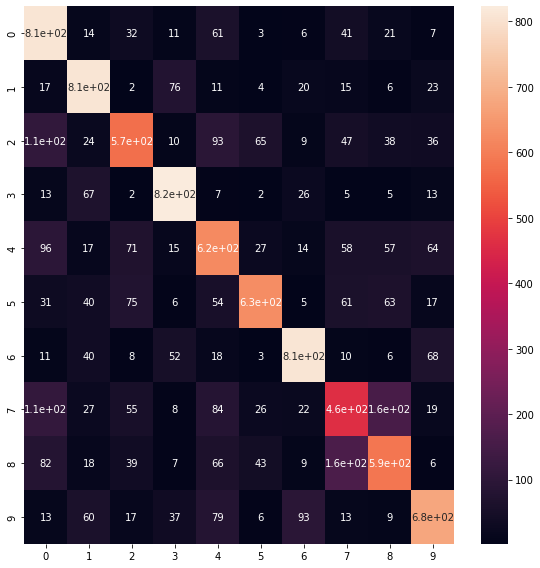

In [ ]:
true_values = np.argmax(Y_test,axis=1)
y_pred = np.argmax(predect,axis=1)
labels_arr = []
for lab in labels:
  labels_arr.append(lab)
## calcualte error ratio
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true_values,y_pred)
fig,axis = plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True)

fig.tight_layout()
plt.show()

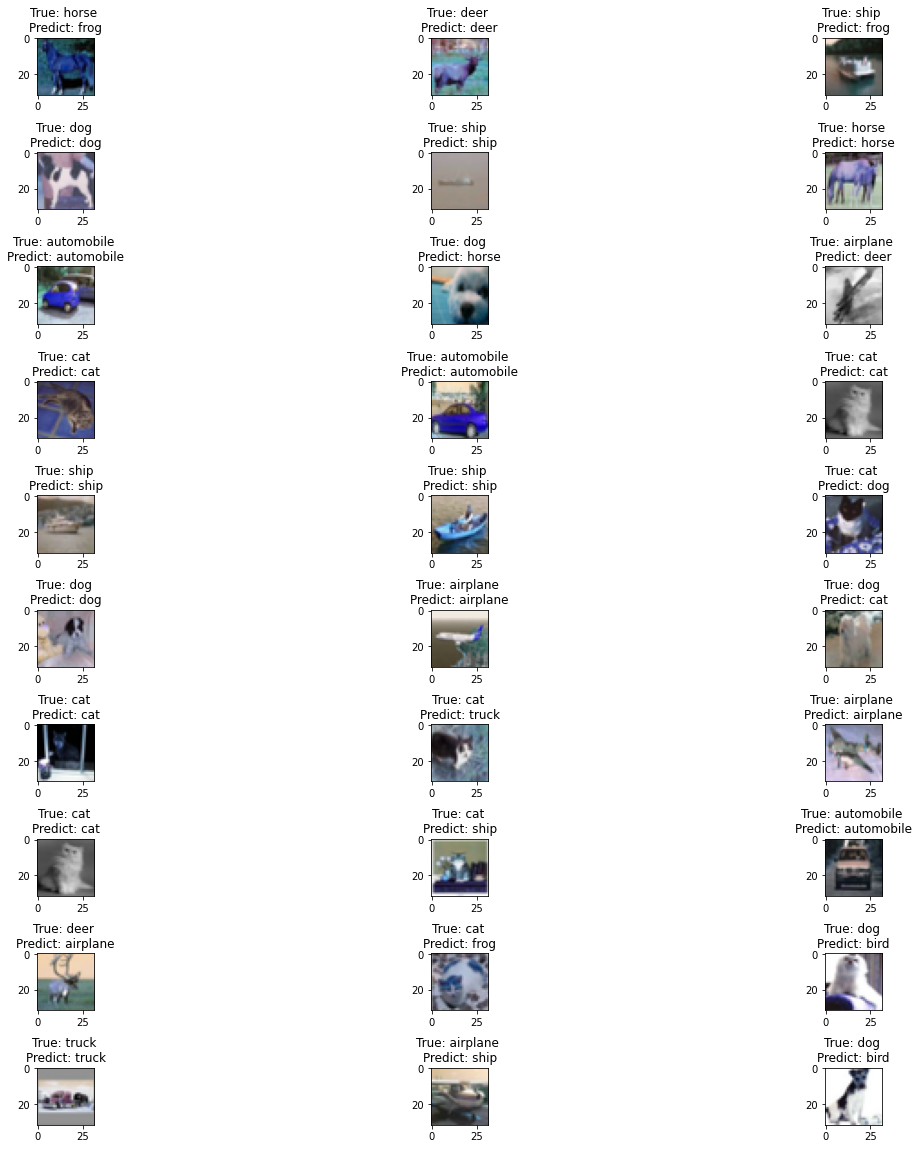

In [ ]:
import random
fig,axis = plt.subplots(10,3,figsize=(20,20))
axis = axis.ravel()
axis = axis.reshape(10,3)
for i in range(10):
  for j in range(3):
    index = random.randint(0,10000)
    axis[i,j].imshow(X_test[index])
    axis[i,j].set_title(f'True: {labels[true_values[index]]} \nPredict: {labels[y_pred[index]]}')
  plt.subplots_adjust(hspace=1)

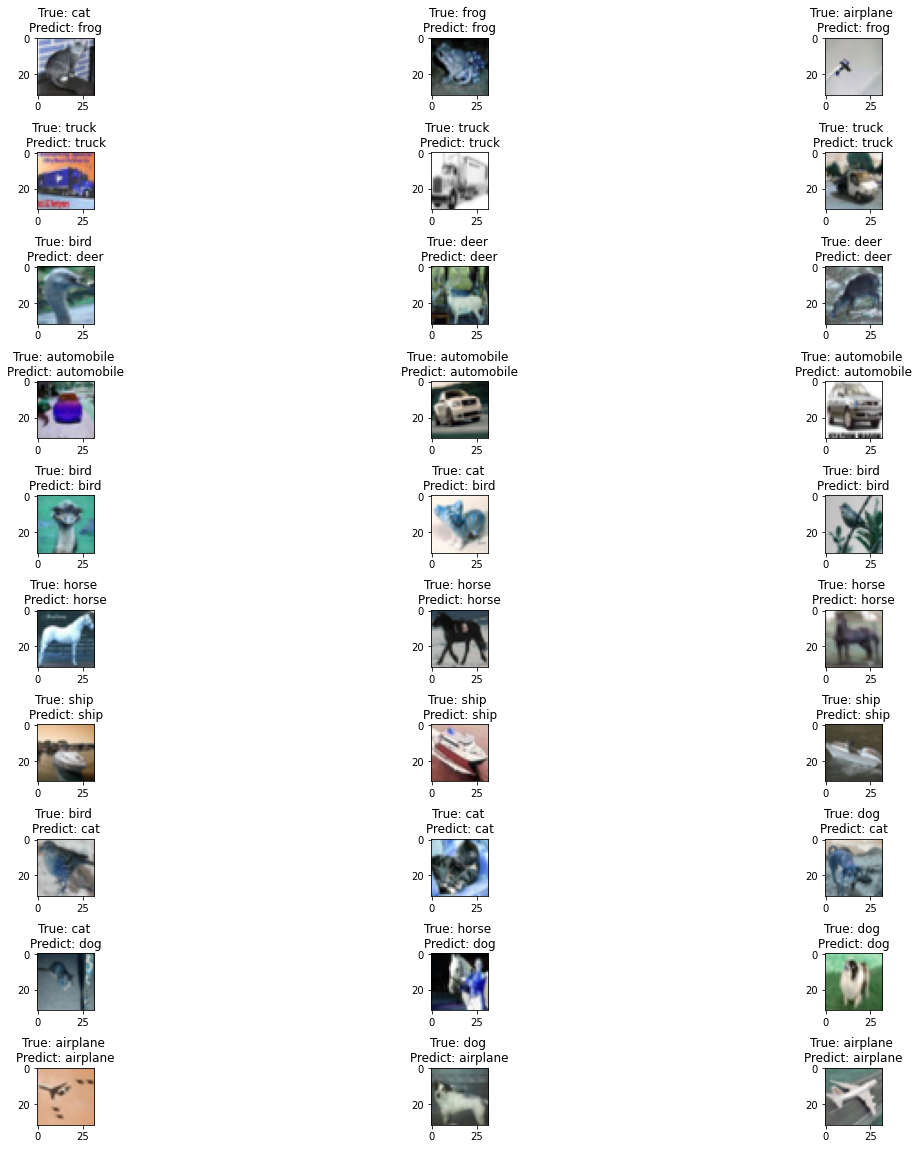

In [ ]:
import random
fig,axis = plt.subplots(10,3,figsize=(20,20))
axis = axis.ravel()
axis = axis.reshape(10,3)

for i in range(len(labels)):
  indexs = []
  for j in range(len(y_pred)):
    if y_pred[j] == i:
      indexs.append(j)
  for j in range(3):
    index = random.choice(indexs)
    axis[i,j].imshow(X_test[index])
    axis[i,j].set_title(f'True: {labels[true_values[index]]} \nPredict: {labels[y_pred[index]]}')
  plt.subplots_adjust(hspace=1)
